In [1]:
import pandas as pd
import numpy as np

# load data
data = pd.read_csv("heart.csv")

# look at columns
print(data.info())

# split into X and y
y = data['HeartDisease']
X = data.drop("HeartDisease", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [2]:
import matplotlib.pyplot as plt

# split into numerical and categorical
cols = X.columns
numerical = data[cols].select_dtypes(include=np.number)
categorical = data[cols].select_dtypes(include='object')

# print the seperated columns
print(numerical.columns)
print(categorical.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


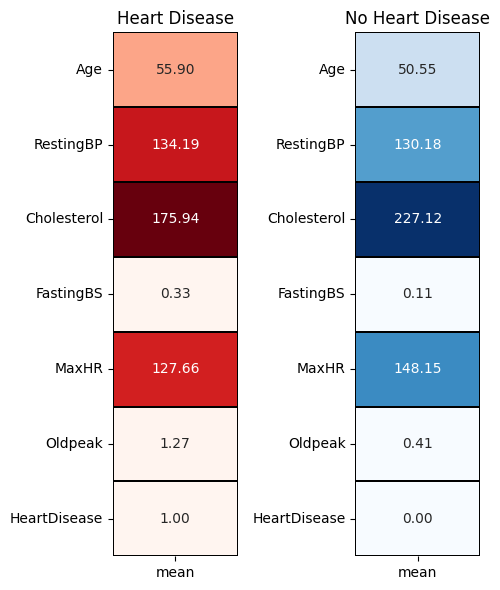

In [3]:
import seaborn as sns

# get values for the target variables
pos = data[data["HeartDisease"] == 1].describe().T
neg = data[data["HeartDisease"] == 0].describe().T

# define graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 6))

# has heart disease
sns.heatmap(pos[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[0], cmap='Reds', linewidths = 1.2, linecolor = 'black')
ax[0].set_title('Heart Disease')

# no heart disease
sns.heatmap(neg[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[1], cmap='Blues', linewidths = 1.2, linecolor = 'black')
ax[1].set_title('No Heart Disease')

# adjust spacing
fig.tight_layout()
plt.show()

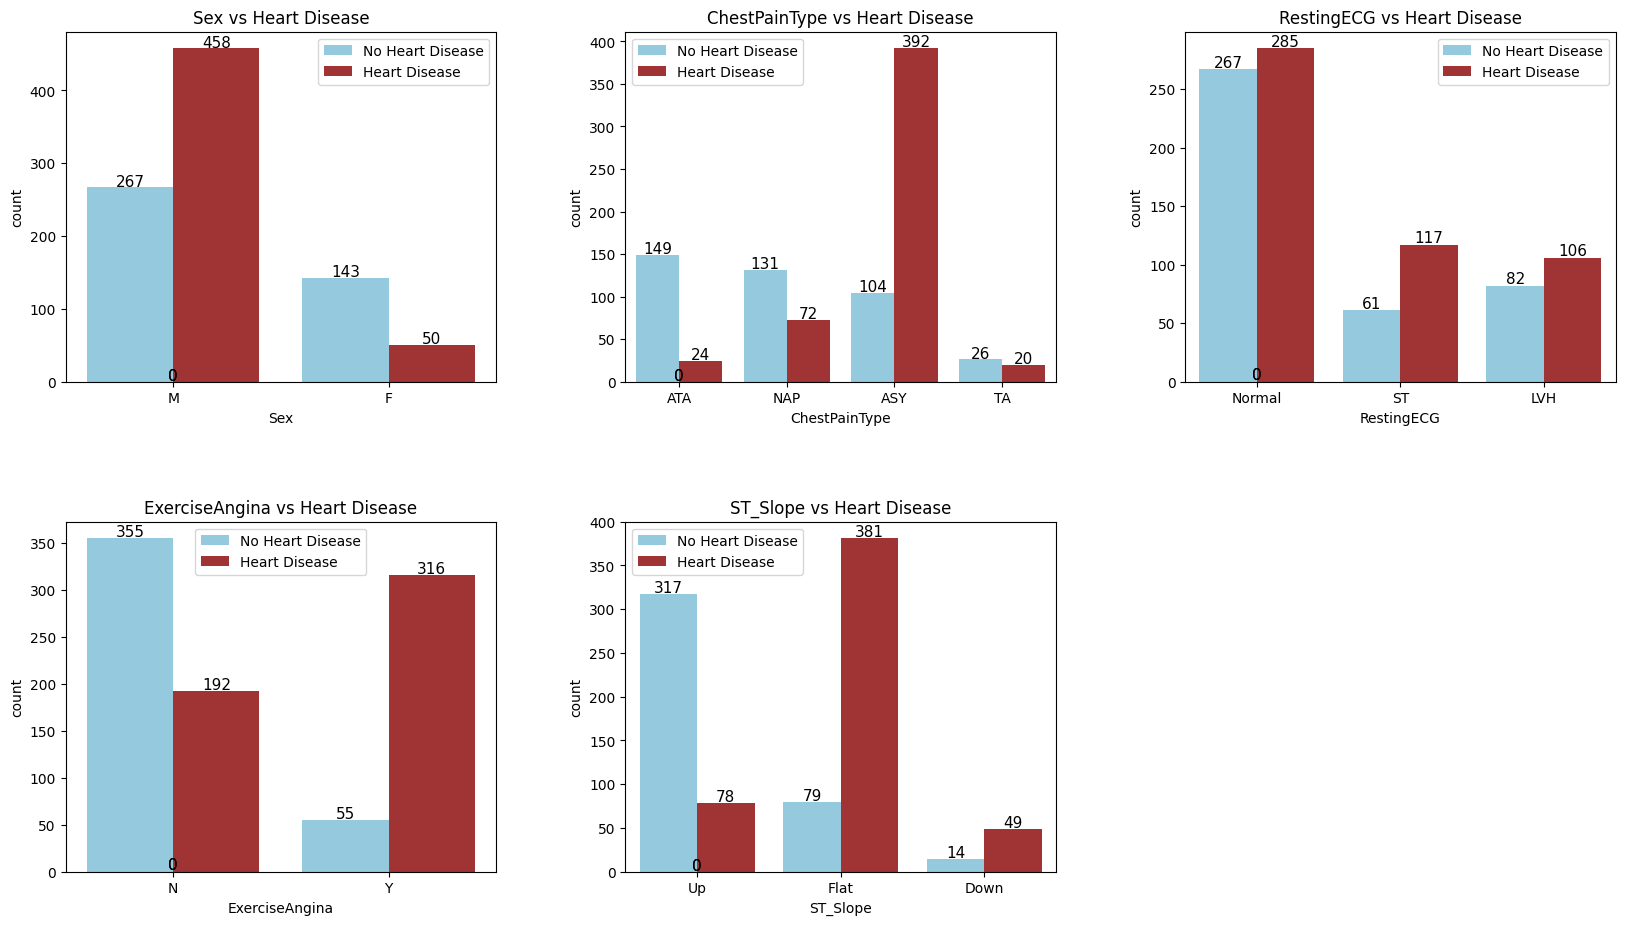

In [4]:
# define the categories
categories = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
colors = {0: "#87CEEB", 1: "#B22222"}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Plot categorical features
for i in range(len(categories)):
    ax = axes[i]
    sns.countplot(x=categories[i], data=data, hue="HeartDisease", palette=colors, ax=ax)
    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                horizontalalignment='center', fontsize=11)

    ax.set_title(f"{categories[i]} vs Heart Disease")
    ax.legend(['No Heart Disease', 'Heart Disease'])

axes[5].axis("off")

# Adjust layout
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4, wspace=0.3)
plt.show()

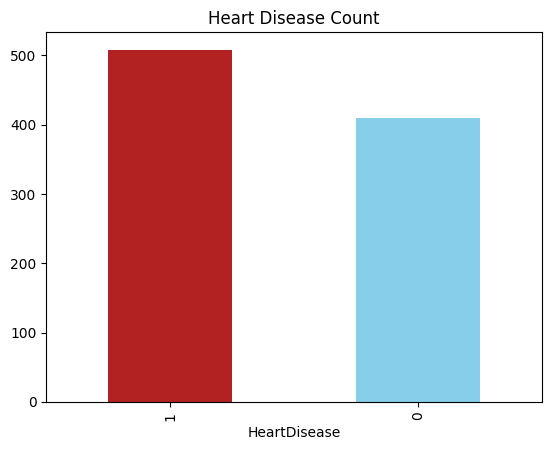

In [5]:
target = data['HeartDisease']
colors = ['#B22222', '#87CEEB']
target.value_counts().plot(kind='bar', title='Heart Disease Count', color=colors)
plt.show()

Looking at the means of the numerical features, we can see that subjects with heart disease are usually a little older, have lower cholesterol values, higher fasting blood sugar, drastically larger oldpeak values and a lower max heart rate. That means these features are particularaly important when it comes to predicting the chances of having heart disease and creating a training dataset.

Looking at the counts of various categorical features, we see that subjects with heart disease are more likely to be male, have high occurences of asymptomatic chest pain, high occurences of excersise angina, and have a flat ST Slope. We should look out for these features when trying to predict heart disease and constructing the training dataset.

Looking at the distribution of subjects with heart disease and subjects without heart diesease, we see a mostly balanced dataset. That means no class is imbalanced and we do not need to use any rebalancing techniques such as under-sampling or over-sampling.    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Convert categorical to numerical columns
encoders = {} 

for col in categories:
    le = LabelEncoder()
    le.fit(X[col])
    X[col] = le.transform(X[col])    
    encoders[col] = le

# train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_pred_prob = lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 87.500%
Precision: 85.586%
Recall: 93.137%
F1-Score: 89.202%
AUC: 89.610%


This dataset is a classification problem. In order to validate my models, I decided to train test split my dataset. I trained my data with 80% of the observation while 20% of the data was used for validation. The performance metrics I used are accuracy, precision, recall, F1, and AUC-ROC Curve. I choose to prioritize the Recall score since I don't want my model to predict false negatives. False negatives are particularly concerning because it's better to warn a user that they might have heart disease when they don’t, than to miss the signs and falsely reassure them that they’re healthy when they’re not.

Based on the graphs I created of the data and the model I trained, it would seem that the best metrics when it comes to predicting the presence of Heart Disease are ST_Slope, Max Heart Rate, Type of Chest Pain, and Cholesterol levels. I am going to take these inputs from the user and see if I can just rely on these features to accurately predict the presence of heart disease.

In [19]:
# sample names
sample_names = ['sample_1', 'sample_2', 'sample_3', 'sample_4']

# sample data
samples = [
    pd.DataFrame([[43, 'F', 'ATA', 120, 215, 0, 'ST', 175, 'N', 0, 'Up']], columns=X.columns),  # 0
    pd.DataFrame([[49, 'M', 'ASY', 140, 185, 0, 'Normal', 130, 'N', 0, 'Up']], columns=X.columns),  # 0
    pd.DataFrame([[41, 'M', 'ASY', 120, 237, 1, 'Normal', 138, 'Y', 1, 'Flat']], columns=X.columns),  # 1
    pd.DataFrame([[51, 'F', 'ASY', 120, 0, 1, 'Normal', 127, 'Y', 1.5, 'Up']], columns=X.columns)  # 1
]

# transform and predict the class for each sample
for name, sample in zip(sample_names, samples):
    for col in categories:
        le = encoders[col]
        sample[col] = le.transform(sample[col])

    # predict using the model
    prediction = lr.predict(sample)
    print(f"Prediction for {name}: {prediction}")


Prediction for sample_1: [0]
Prediction for sample_2: [0]
Prediction for sample_3: [1]
Prediction for sample_4: [1]
